In [2]:
%matplotlib inline

#Load required modules
import sys, os, argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import math
import graphviz as gv
sns.set_style('whitegrid')

### Set up seaborn appearence
mpl.rc('text', usetex = True)
sns.set_context("notebook", font_scale=1.5)
plt.rc("axes.spines", top=True, right=True)

In [3]:
# Load oncolib module
sys.path.append("/Users/melkebir/Projects/OncoSim/build/")
import oncolib

# 1. Generate simulations

In [4]:
mutRateList = [0.1, 0.2, 0.4]
sampleCountList = [1, 2, 5, 10]
# sampleCountList = [2]

## 1.1 Simulate tumors

In [ ]:
if not os.path.exists("simulate_output"):
    os.mkdir("simulate_output")
    
for M in mutRateList:
    out_dir = "simulate_output/M%.1f" % (M)
    if not os.path.exists(out_dir):
        os.mkdir(out_dir)
        
    oncolib.simulate(out_dir, {'nrSamplesPerAnatomicalSite' : 0, 'nrTrials' : 20, 
                               'maxNrAnatomicalSites' : 1, 'nrSamplesPrimary' : 1,
                               'mutationRate' : M})

## 1.2 Generate samples from each simulated tree

In [ ]:
if not os.path.exists("mix_output"):
    os.mkdir("mix_output")
    
for M in mutRateList:
    in_dir = "simulate_output/M%.1f" % (M)
    for filename in glob.glob(in_dir + "/*.tree"):
        seed = int(filename.rstrip(".tree").split("/")[-1].split("_")[-1].lstrip('seed'))
        for k in sampleCountList:
            out_filename = "mix_output/M%.1f_S%d_k%d.tree" % (M, seed, k)
            oncolib.mix(filename, out_filename, k, True)
            out_filename_freqs = "mix_output/M%.1f_S%d_k%d.tsv" % (M, seed, k)
            oncolib.tree2freqs(out_filename, out_filename_freqs)
            out_filename_precluster = "mix_output/M%.1f_S%d_k%d_clustered.tsv" % (M, seed, k)
            clustering_filename = "simulate_output/M%.1f/clustering_observed_seed%d.txt" % (M, seed)
            oncolib.precluster(out_filename_freqs, clustering_filename, out_filename_precluster)

# 2. Solve simulated instances

## 2.1 Enumerate mutation trees

In [ ]:
if not os.path.exists("enumerate_output"):
    os.mkdir("enumerate_output")

for M in mutRateList:
    for k in sampleCountList:
        for filename in glob.glob("mix_output/M%.1f*_k%d_clustered.tsv" % (M, k)):
            out_filename = "enumerate_output/" + os.path.basename(filename).rstrip(".tsv") + ".txt"
            if not os.path.exists(out_filename):
                print out_filename
                oncolib.enumerate(filename, out_filename, True, 1, -1, True)

In [5]:
with open("results.tsv", "w") as f:
    f.write("\t".join(["M", "seed", "k", "n", "bound", "count", "inc"]) + "\n")
    for M in mutRateList:
        for k in sampleCountList:
            for filename in glob.glob("mix_output/M%.1f*_k%d_clustered.tsv" % (M, k)):
                seed = int(filename.split("_")[2][1:])
                bound = oncolib.countSpanningTrees(filename)
                inc = oncolib.getFractionOfIncomparablePairs(filename)
                with open(filename) as ff:
                    ff.readline()
                    ff.readline()
                    n = int(ff.readline().split()[0])
                
                try:
                    with open("enumerate_output/" + os.path.basename(filename).rstrip(".tsv") + ".txt") as ff:
                        count = int(ff.readline().split()[0])

                    MM = "%.1f" % M
                    f.write("\t".join(map(str, [MM, seed, k, n, bound, count, inc])) + "\n")
                except ValueError:
                    print "ValueError", filename
                except IndexError:
                    print "IndexError", filename

IndexError mix_output/M0.4_S7_k1_clustered.tsv


In [25]:
if not os.path.exists("recall_output"):
    os.mkdir("recall_output")
    
for M in mutRateList:
    for k in sampleCountList:
        for filename in glob.glob("enumerate_output/M%.1f*_k%d_clustered.txt" % (M, k)):
            seed = int(filename.split("_")[2][1:])
            out_filename = os.path.basename(filename).rstrip(".txt")
            print out_filename
            oncolib.computeRecall(filename, "simulate_output/M%.1f_S%d.tree" % (M, seed), 
                                  "recall_output/" + out_filename + ".tsv")

M0.1_S26_k1_clustered
M0.1_S18_k1_clustered
M0.1_S5_k1_clustered
M0.1_S17_k1_clustered
M0.1_S12_k1_clustered
M0.1_S0_k1_clustered
M0.1_S27_k1_clustered
M0.1_S19_k1_clustered
M0.1_S23_k1_clustered
M0.1_S4_k1_clustered
M0.1_S8_k1_clustered
M0.1_S24_k1_clustered
M0.1_S3_k1_clustered
M0.1_S30_k1_clustered
M0.1_S15_k1_clustered
M0.1_S7_k1_clustered
M0.1_S9_k1_clustered
M0.1_S25_k1_clustered
M0.1_S2_k1_clustered
M0.1_S10_k1_clustered
M0.1_S17_k2_clustered
M0.1_S5_k2_clustered
M0.1_S18_k2_clustered
M0.1_S26_k2_clustered
M0.1_S4_k2_clustered
M0.1_S23_k2_clustered
M0.1_S19_k2_clustered
M0.1_S27_k2_clustered
M0.1_S0_k2_clustered
M0.1_S12_k2_clustered
M0.1_S7_k2_clustered
M0.1_S15_k2_clustered
M0.1_S3_k2_clustered
M0.1_S30_k2_clustered
M0.1_S24_k2_clustered
M0.1_S8_k2_clustered
M0.1_S10_k2_clustered
M0.1_S2_k2_clustered
M0.1_S25_k2_clustered
M0.1_S9_k2_clustered
M0.1_S26_k5_clustered
M0.1_S18_k5_clustered
M0.1_S17_k5_clustered
M0.1_S5_k5_clustered
M0.1_S0_k5_clustered
M0.1_S12_k5_clustered
M0.1_S

RuntimeError: Error: number of edges should be nonnegative

In [6]:
df = pd.read_table("results.tsv")

Text(0,0.5,u'number $n$ of mutations')

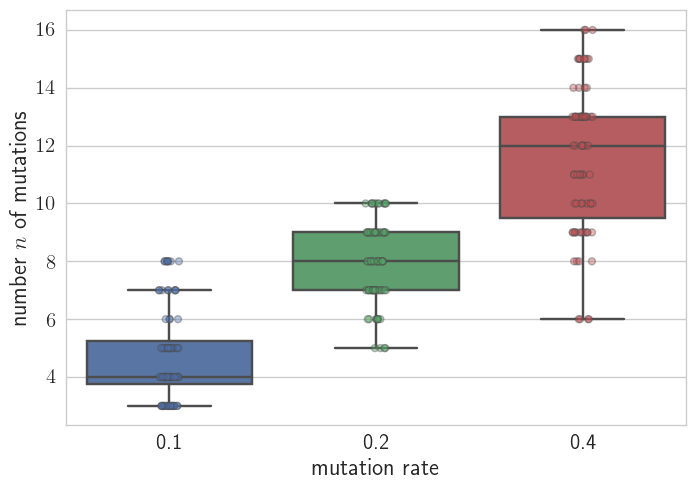

In [46]:
sns.stripplot(data=df, x="M", y="n", alpha=.4, linewidth=1, jitter=.05)
ax = sns.boxplot(data=df, x="M", y="n", showfliers=False)
ax.set_xlabel("mutation rate")
ax.set_ylabel("number $n$ of mutations")

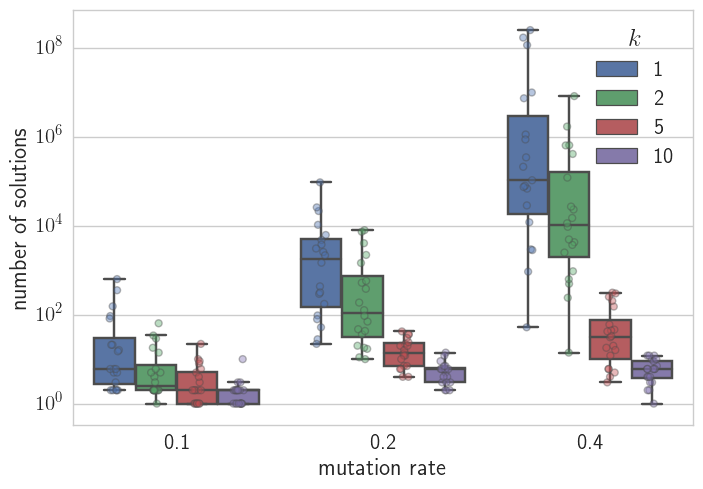

In [49]:
df['logcount'] = np.log10(df['count'])
sns.stripplot(data=df, x="M", y="logcount", hue="k", alpha=.4, split=True, linewidth=1, jitter=.1)
ax = sns.boxplot(data=df, x="M", y="logcount", hue="k", showfliers=False)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], title="$k$")
ax.set_yticklabels(["", "$10^{0}$", "$10^{2}$", "$10^{4}$", "$10^6$", "$10^8$"])
ax.set_xlabel("mutation rate")
ax.set_ylabel("number of solutions")
pass

Text(0,0.5,u'number of spanning trees')

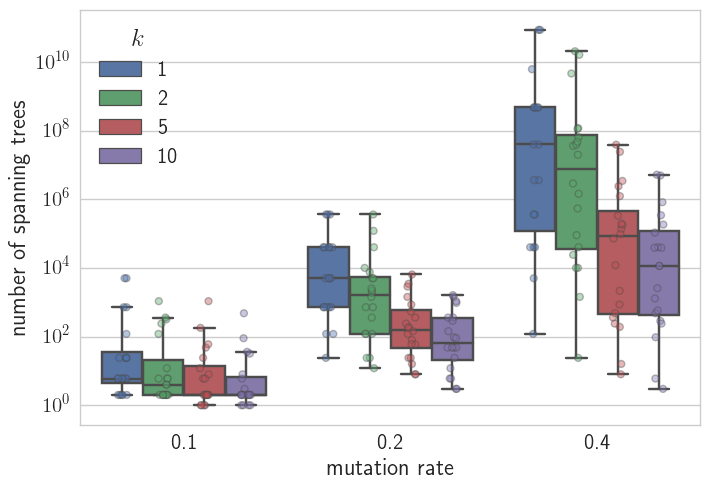

In [9]:
df['logbound'] = np.log10(df['bound'])
sns.stripplot(data=df, x="M", y="logbound", hue="k", split=True, linewidth=1, alpha=.4, jitter=.1)
ax = sns.boxplot(data=df, x="M", y="logbound", hue="k", showfliers=False)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], title="$k$")
ax.set_yticklabels(["", "$10^{0}$", "$10^{2}$", "$10^{4}$", "$10^6$", "$10^8$", "$10^{10}$"])
ax.set_xlabel("mutation rate")
ax.set_ylabel("number of spanning trees")

Text(0,0.5,u'fraction of incomparable mutations')

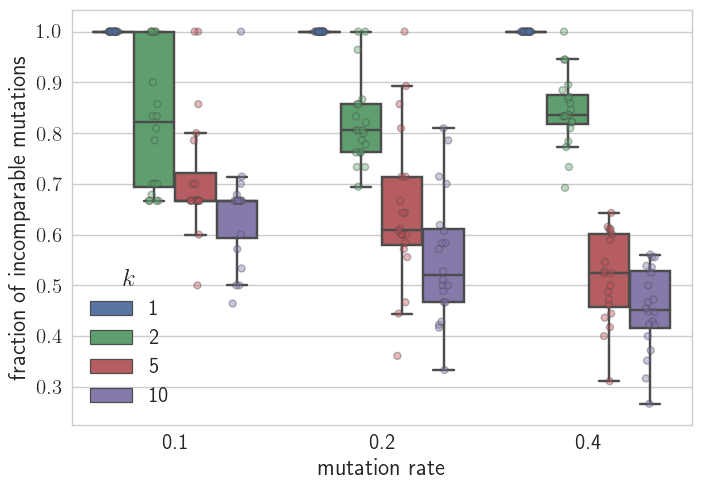

In [11]:
sns.stripplot(data=df, x="M", y="inc", hue="k", alpha=.4, jitter=.1, linewidth=1, split=True)
ax = sns.boxplot(data=df, x="M", y="inc", hue="k", showfliers=False)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], title="$k$")
ax.set_xlabel("mutation rate")
ax.set_ylabel("fraction of incomparable mutations")

Text(0,0.5,u'\\# solutions / \\# spanning trees')

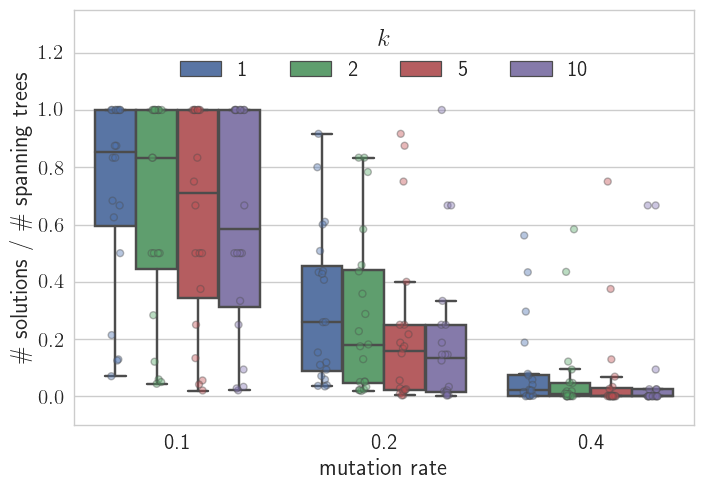

In [22]:
df['ratio'] = df['count'] / df['bound']
sns.stripplot(data=df, x="M", y="ratio", hue="k", alpha=.4, jitter=.1, linewidth=1, split=True)
ax = sns.boxplot(data=df, x="M", y="ratio", hue="k", showfliers=False)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], title="$k$", ncol=4, loc="upper center")
ax.set_ylim((-0.1, 1.35))
ax.set_xlabel("mutation rate")
ax.set_ylabel("\# solutions / \# spanning trees")